In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file_path_handwritten = 'topic_summary.xlsx'
file_path_gpt = 'topic_summary_gpt.xlsx'

df_handwritten = pd.read_excel(file_path_handwritten)
df_gpt = pd.read_excel(file_path_gpt)



In [10]:
# Identify common topics using set intersection
common_topics = set(df_gpt['topic']).intersection(set(df_handwritten['topic']))

# Filter both dataframes for these common topics and keep the relevant columns
common_columns = ['topic', 'avg_word_count', 'std_word_count', 'avg_body_length', 'std_body_length', 'avg_formality_ratio', 'std_formality_ratio']
df_gpt_filtered = df_gpt[df_gpt['topic'].isin(common_topics)][common_columns].set_index('topic')
df_handwritten_filtered = df_handwritten[df_handwritten['topic'].isin(common_topics)][common_columns].set_index('topic')

# Combine the two dataframes for easier plotting
df_combined = df_gpt_filtered.rename(columns=lambda x: f"{x}_gpt").join(
    df_handwritten_filtered.rename(columns=lambda x: f"{x}_handwritten"),
    how='inner'
)

# Preview the combined dataframe
df_combined.head()


,avg_word_count_gpt,std_word_count_gpt,avg_body_length_gpt,std_body_length_gpt,avg_formality_ratio_gpt,std_formality_ratio_gpt,avg_word_count_handwritten,std_word_count_handwritten,avg_body_length_handwritten,std_body_length_handwritten,avg_formality_ratio_handwritten,std_formality_ratio_handwritten
topic,,,,,,,,,,,,
Academic,198.48,36.80,1244.56,250.16,26.98,37.47,59.63,71.48,431.16,485.45,4.00,3.25
Accommodation,176.45,33.37,1102.91,217.20,9.70,9.93,54.91,59.87,471.55,855.66,4.03,4.10
Complaints,198.74,37.13,1229.02,239.85,17.64,33.54,61.91,44.74,442.12,319.51,5.85,8.89
Empty,3.80,29.50,22.65,176.90,0.24,3.24,2.88,15.49,21.29,112.94,1.42,2.26
Other Help,143.50,48.79,848.00,277.19,10.02,4.61,18.45,12.60,145.20,89.37,2.49,0.91


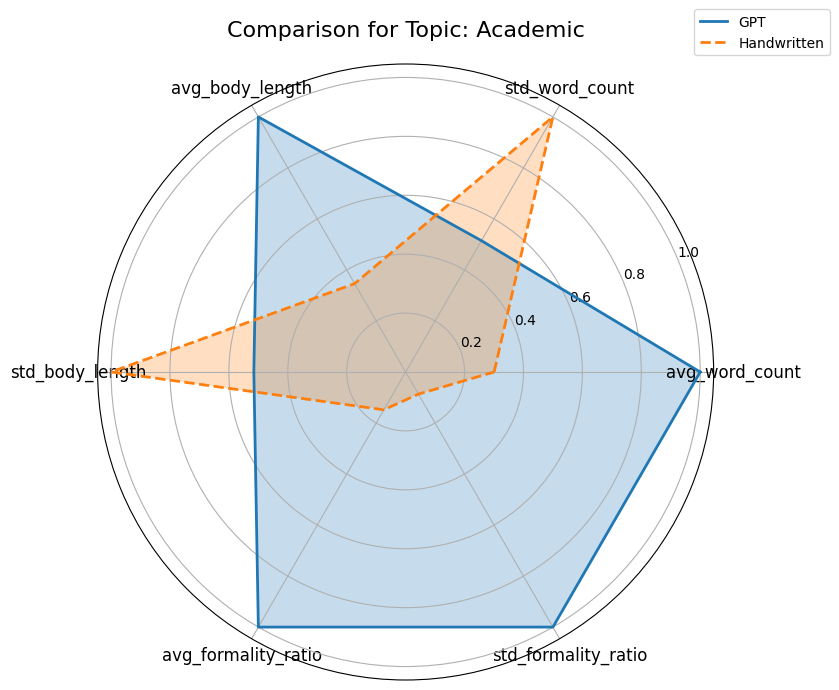

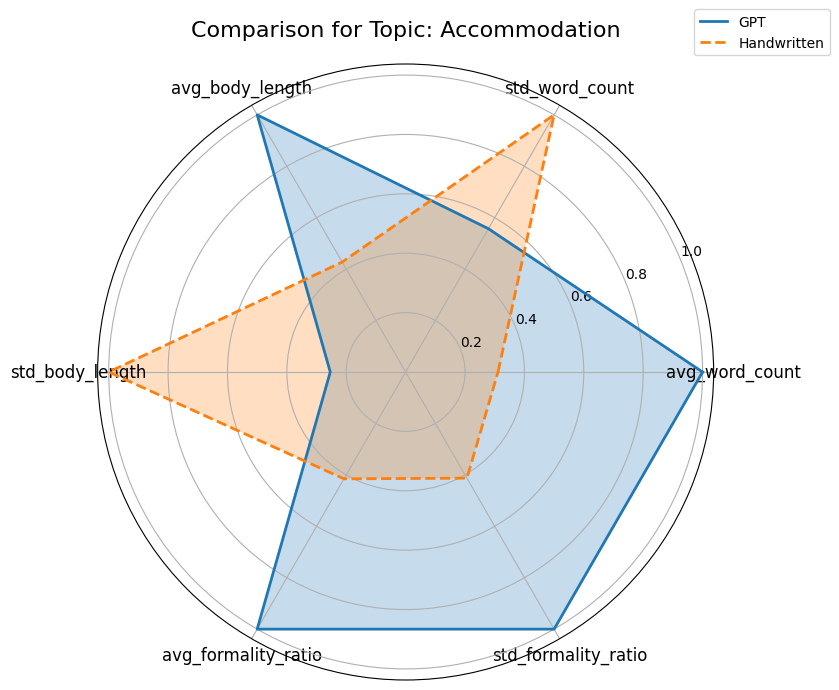

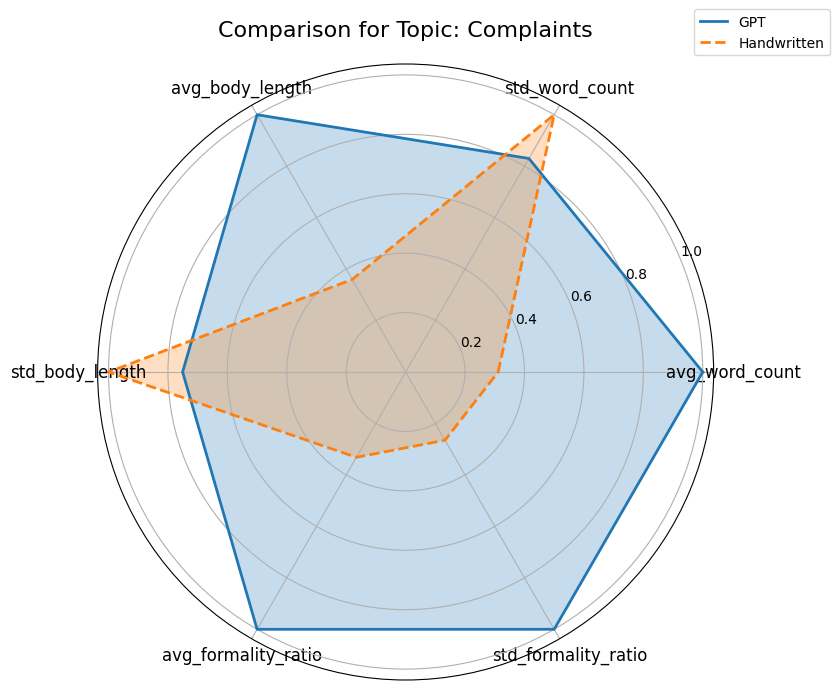

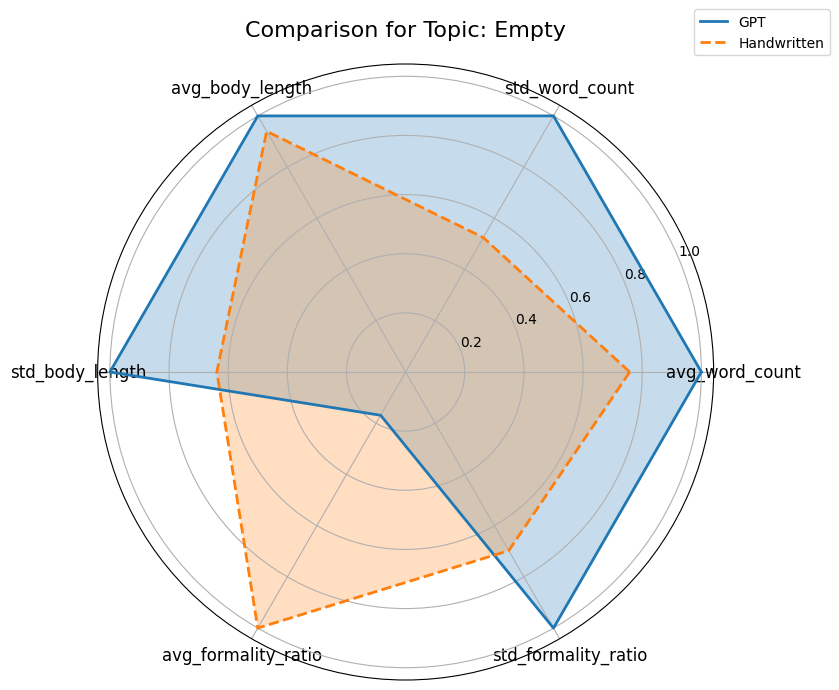

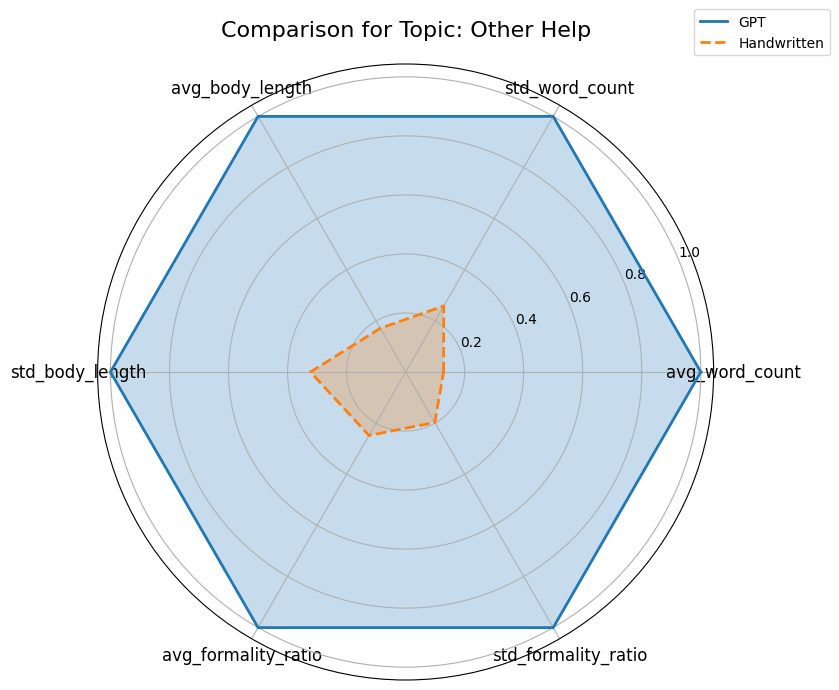

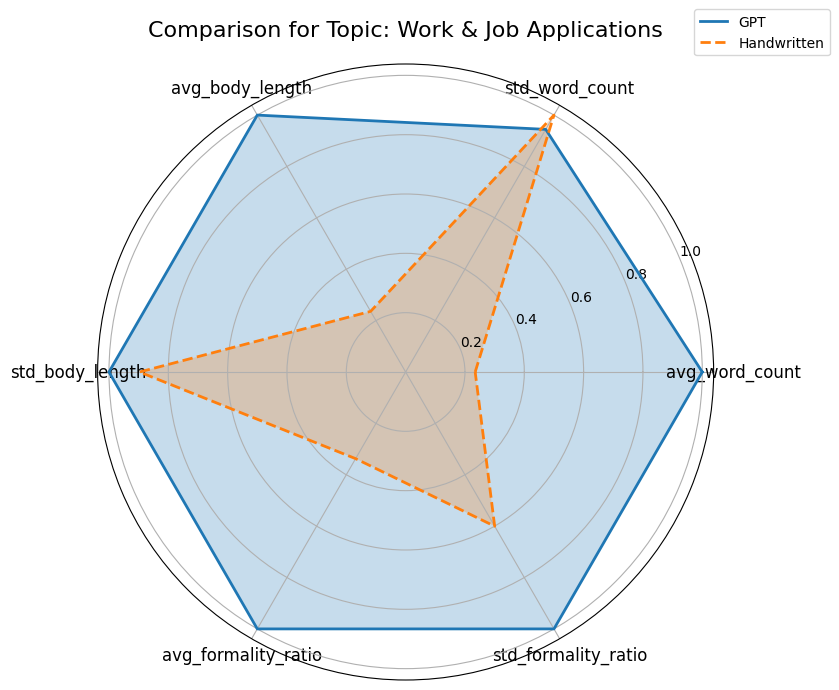

In [13]:
# Function to create radar chart for a given topic
def plot_radar_chart(topic, data):
    categories = ['avg_word_count', 'std_word_count', 'avg_body_length', 'std_body_length', 
                  'avg_formality_ratio', 'std_formality_ratio']
    gpt_values = data.loc[topic, [f"{cat}_gpt" for cat in categories]].values
    handwritten_values = data.loc[topic, [f"{cat}_handwritten" for cat in categories]].values

    # Normalize the data for better visual comparison
    max_vals = np.maximum(gpt_values, handwritten_values)
    gpt_values_normalized = gpt_values / max_vals
    handwritten_values_normalized = handwritten_values / max_vals

    # Close the loop for radar chart
    gpt_values_normalized = np.append(gpt_values_normalized, gpt_values_normalized[0])
    handwritten_values_normalized = np.append(handwritten_values_normalized, handwritten_values_normalized[0])
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, gpt_values_normalized, label='GPT', linewidth=2, linestyle='solid')
    ax.fill(angles, gpt_values_normalized, alpha=0.25)

    ax.plot(angles, handwritten_values_normalized, label='Handwritten', linewidth=2, linestyle='dashed')
    ax.fill(angles, handwritten_values_normalized, alpha=0.25)

    # Labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(f"Comparison for Topic: {topic}", fontsize=16, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.show()

# Generate radar charts for each topic
for topic in df_combined.index:
    plot_radar_chart(topic, df_combined)


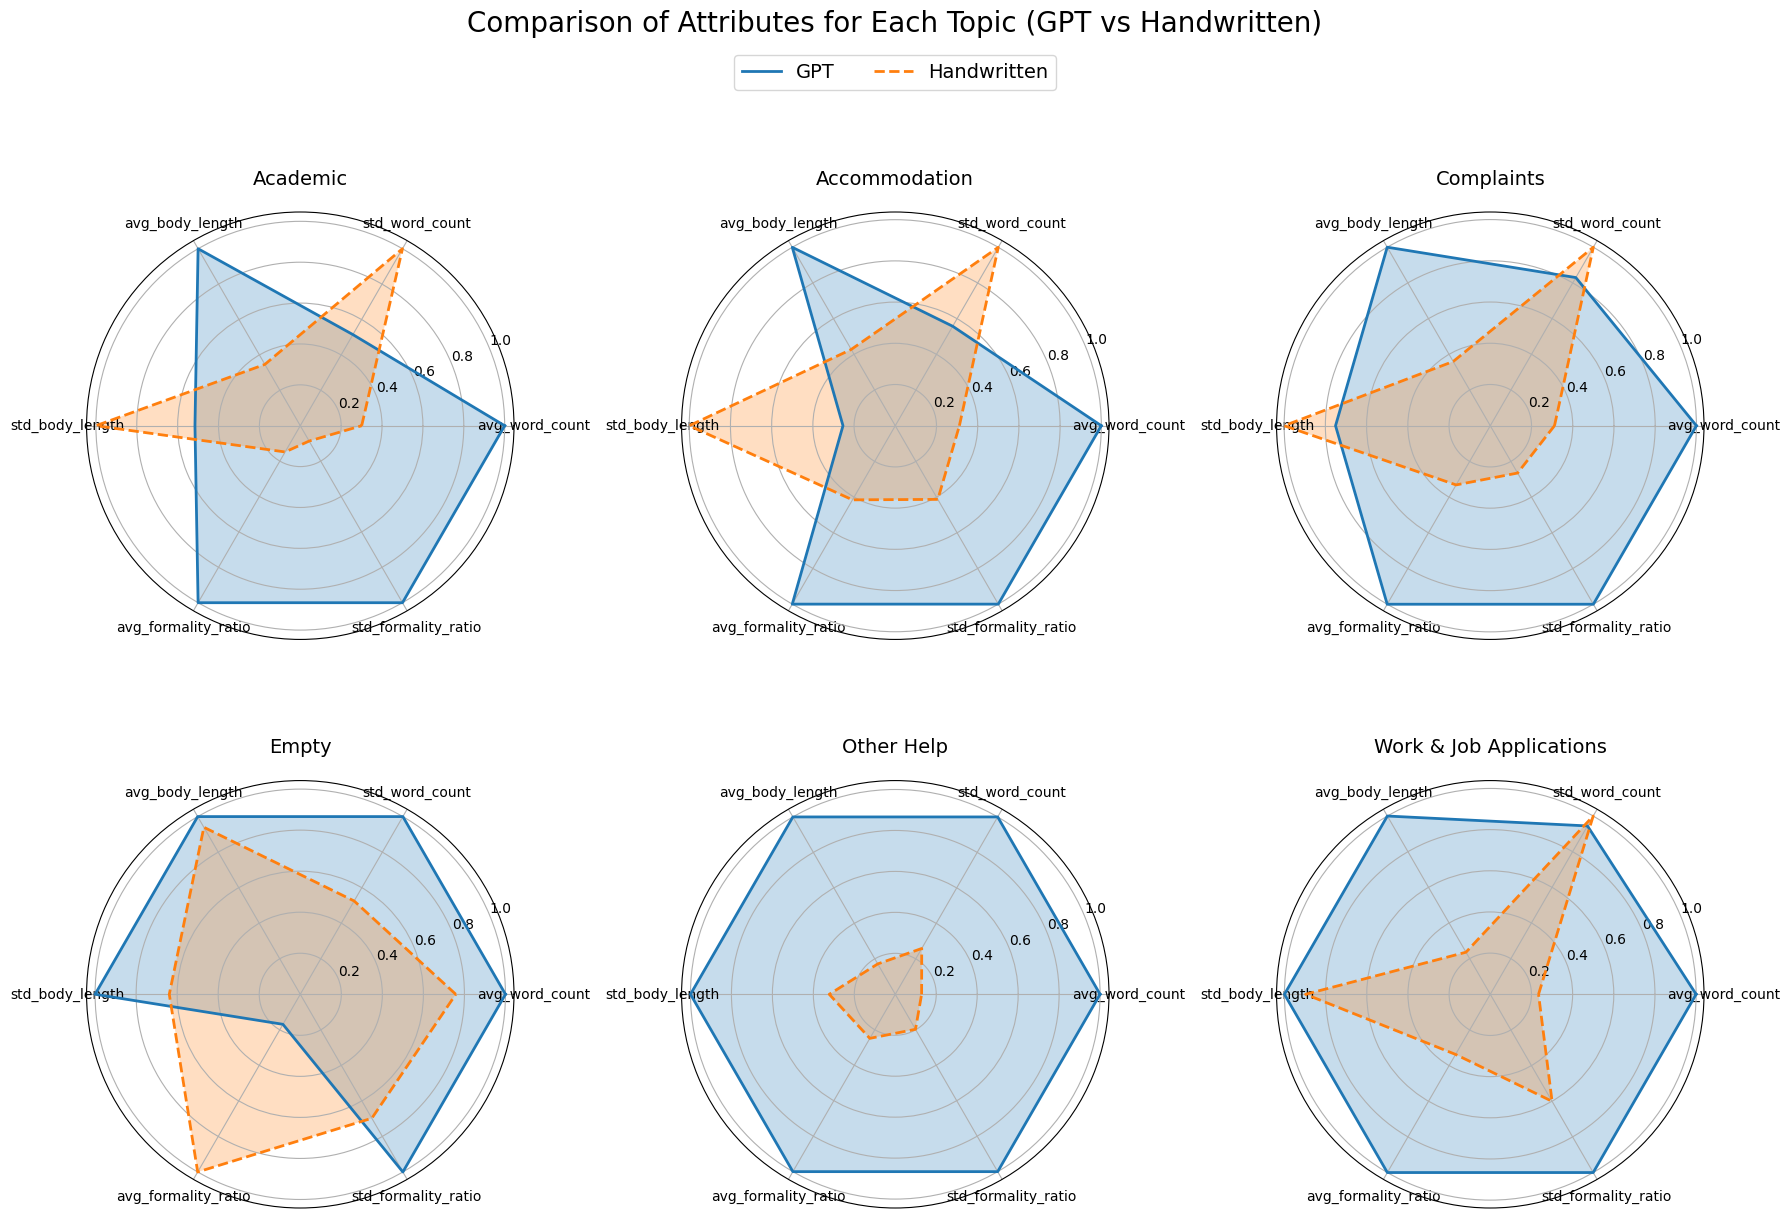

In [14]:
# Create subplots for radar charts of all topics
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
fig.suptitle("Comparison of Attributes for Each Topic (GPT vs Handwritten)", fontsize=20, y=1.05)

# Categories and angles for radar chart
categories = ['avg_word_count', 'std_word_count', 'avg_body_length', 'std_body_length', 
              'avg_formality_ratio', 'std_formality_ratio']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot each topic in a separate subplot
for ax, (topic, data) in zip(axes.flatten(), df_combined.iterrows()):
    gpt_values = data[[f"{cat}_gpt" for cat in categories]].values
    handwritten_values = data[[f"{cat}_handwritten" for cat in categories]].values

    # Normalize the data
    max_vals = np.maximum(gpt_values, handwritten_values)
    gpt_values_normalized = gpt_values / max_vals
    handwritten_values_normalized = handwritten_values / max_vals

    # Close the loop for radar chart
    gpt_values_normalized = np.append(gpt_values_normalized, gpt_values_normalized[0])
    handwritten_values_normalized = np.append(handwritten_values_normalized, handwritten_values_normalized[0])

    # Plot
    ax.plot(angles, gpt_values_normalized, label='GPT', linewidth=2, linestyle='solid')
    ax.fill(angles, gpt_values_normalized, alpha=0.25)
    ax.plot(angles, handwritten_values_normalized, label='Handwritten', linewidth=2, linestyle='dashed')
    ax.fill(angles, handwritten_values_normalized, alpha=0.25)

    # Title and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(topic, fontsize=14, pad=20)

# Adjust layout and add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=14, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import ttest_ind

# Load the uploaded data for enhanced classified emails and cleaned data without outliers
file_path_enhanced = 'enhanced_classified_emails_gpt.xlsx'
file_path_cleaned = 'cleaned_data_no_outliers_IQR.xlsx'

df_enhanced = pd.read_excel(file_path_enhanced)
df_cleaned = pd.read_excel(file_path_cleaned)

# Filter the topics to exclude "Empty"
df_enhanced_filtered = df_enhanced[df_enhanced['topic'] != 'Empty']
df_cleaned_filtered = df_cleaned[df_cleaned['topic'] != 'Empty']

# Identify common topics and attributes
common_topics = set(df_enhanced_filtered['topic']).intersection(set(df_cleaned_filtered['topic']))
common_columns = ['word_count','body_length' 
                  ,'formality_ratio']

# Initialize a results dataframe for hypothesis testing
results = []

for topic in common_topics:
    for column in common_columns:
        # Extract data for the given topic and column from both datasets
        gpt_data = df_enhanced_filtered[df_enhanced_filtered['topic'] == topic][column].dropna()
        non_gpt_data = df_cleaned_filtered[df_cleaned_filtered['topic'] == topic][column].dropna()
        
        # Perform a two-sample t-test
        t_stat, p_value = ttest_ind(gpt_data, non_gpt_data, equal_var=False)  # Assuming unequal variances
        
        # Append results
        results.append({
            'Topic': topic,
            'Attribute': column,
            'T-Statistic': t_stat,
            'P-Value': p_value
        })

# Convert results to a dataframe
results_df = pd.DataFrame(results)

print(results_df.head())

           Topic        Attribute  T-Statistic       P-Value
0  Accommodation       word_count    20.877989  4.943387e-38
1  Accommodation      body_length    18.288368  4.323180e-33
2  Accommodation  formality_ratio     4.586719  2.211173e-05
3       Academic       word_count    29.643968  1.422508e-50
4       Academic      body_length    26.787830  6.218865e-46


In [22]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

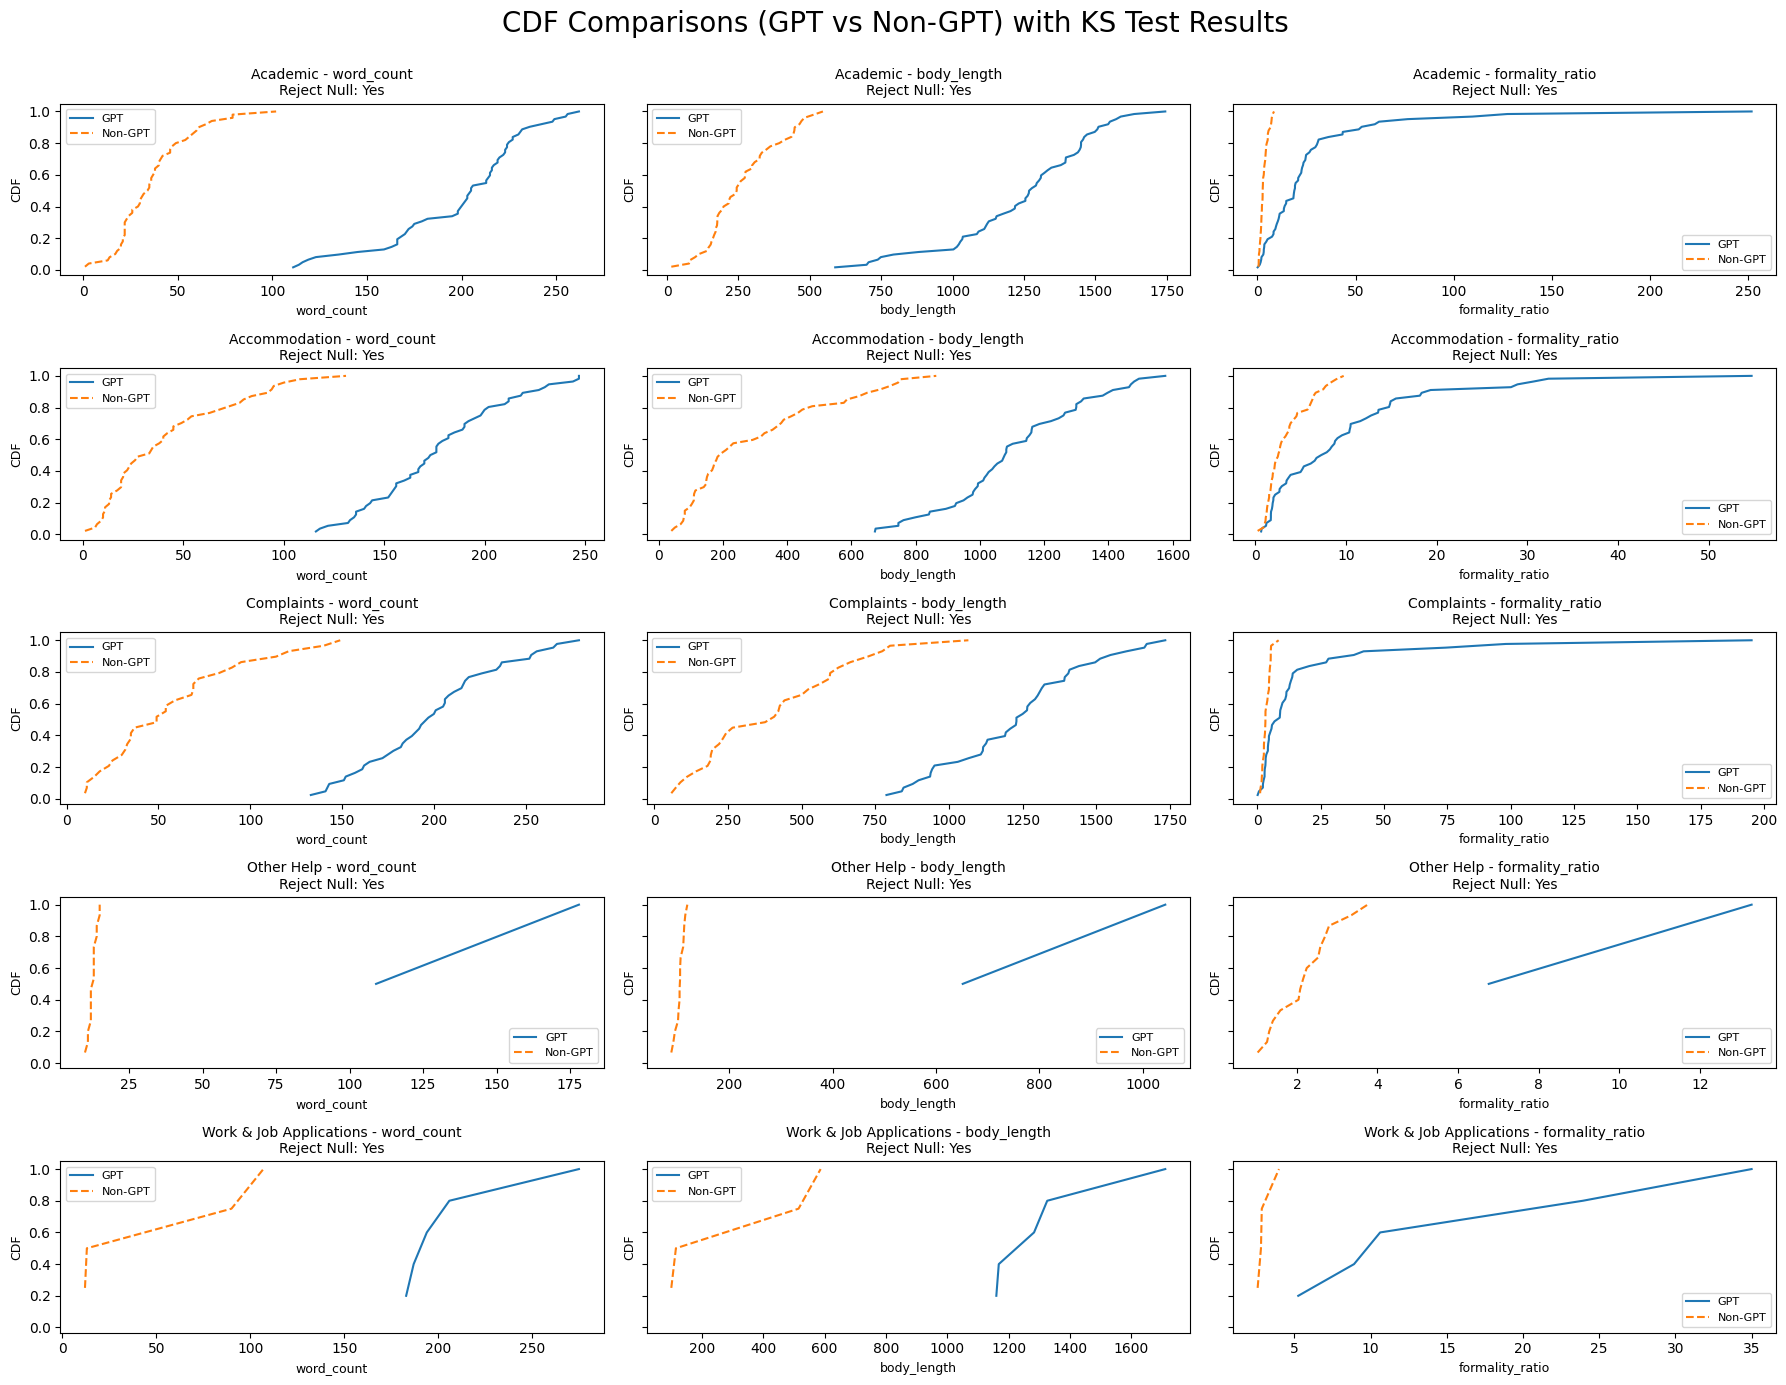

In [21]:
# Function to plot CDF for GPT and non-GPT data
def plot_cdf(data, ax, label, linestyle):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax.plot(sorted_data, cdf, label=label, linestyle=linestyle)

# Create subplots for CDF plots
fig, axes = plt.subplots(len(common_topics), len(common_columns), figsize=(18, 15), sharey=True)
fig.suptitle("CDF Comparisons (GPT vs Non-GPT) with KS Test Results", fontsize=20, y=0.92)

ks_results = []

for i, topic in enumerate(sorted(common_topics)):
    for j, column in enumerate(common_columns):
        # Extract data for the given topic and column from both datasets
        gpt_data = df_enhanced_filtered[df_enhanced_filtered['topic'] == topic][column].dropna()
        non_gpt_data = df_cleaned_filtered[df_cleaned_filtered['topic'] == topic][column].dropna()
        
        # Perform KS test
        ks_stat, ks_p_value = ks_2samp(gpt_data, non_gpt_data)
        reject_null = ks_p_value < alpha  # Whether to reject the null hypothesis
        
        # Append results
        ks_results.append({
            'Topic': topic,
            'Attribute': column,
            'KS-Statistic': ks_stat,
            'P-Value': ks_p_value,
            'Reject Null': 'Yes' if reject_null else 'No'
        })
        
        # Plot CDFs
        ax = axes[i, j]
        plot_cdf(gpt_data, ax, label='GPT', linestyle='solid')
        plot_cdf(non_gpt_data, ax, label='Non-GPT', linestyle='dashed')
        ax.set_title(f"{topic} - {column}\nReject Null: {'Yes' if reject_null else 'No'}", fontsize=10)
        ax.set_xlabel(column, fontsize=9)
        ax.set_ylabel('CDF', fontsize=9)
        ax.legend(fontsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Convert KS test results to a DataFrame and display
ks_results_df = pd.DataFrame(ks_results)
